In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
n_pcs = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 54]


keros_SVC = np.array([0.02105263, 0.33333333, 0.6877193, 0.86140351, 0.88947368, 0.93508772,
 0.94035088, 0.94736842, 0.96315789, 0.95438596, 0.95789474, 0.95789474]).reshape(-1,1)
keros_rf = np.array([0.02105263, 0.14736842, 0.26140351, 0.41578947, 0.4122807,  0.51052632,
 0.48421053, 0.48421053, 0.51052632, 0.50877193, 0.47192982, 0.49122807]).reshape(-1,1)

# standardization dividing by variance and not by dev_std:
'''
keros_SVC_old = [0.01052632, 0.21403509, 0.56842105, 0.61052632, 0.70877193, 0.75438596,
 0.82631579, 0.84736842, 0.86491228, 0.8754386 , 0.89298246, 0.9]
keros_rf_old = [0.02105263, 0.09649123, 0.3245614,  0.39824561, 0.46491228, 0.46666667,
 0.54736842, 0.58596491, 0.6105263, 0.62807018, 0.63859649, 0.66491228]
'''
klinear_SVC = np.array([0.00526316, 0.26491228, 0.44912281, 0.65263158, 0.79649123, 0.84035088,
 0.88421053, 0.89649123, 0.91052632, 0.91754386, 0.93508772, 0.93508772]).reshape(-1,1)
klinear_rf = np.array([0.01754386, 0.22280702, 0.3245614, 0.49122807, 0.59298246, 0.66842105,
 0.79298246, 0.81754386, 0.85614035, 0.85614035, 0.86491228, 0.88947368]).reshape(-1,1)

In [3]:
np.hstack([keros_SVC, keros_rf, klinear_SVC, klinear_rf])

array([[0.02105263, 0.02105263, 0.00526316, 0.01754386],
       [0.33333333, 0.14736842, 0.26491228, 0.22280702],
       [0.6877193 , 0.26140351, 0.44912281, 0.3245614 ],
       [0.86140351, 0.41578947, 0.65263158, 0.49122807],
       [0.88947368, 0.4122807 , 0.79649123, 0.59298246],
       [0.93508772, 0.51052632, 0.84035088, 0.66842105],
       [0.94035088, 0.48421053, 0.88421053, 0.79298246],
       [0.94736842, 0.48421053, 0.89649123, 0.81754386],
       [0.96315789, 0.51052632, 0.91052632, 0.85614035],
       [0.95438596, 0.50877193, 0.91754386, 0.85614035],
       [0.95789474, 0.47192982, 0.93508772, 0.86491228],
       [0.95789474, 0.49122807, 0.93508772, 0.88947368]])

In [4]:
import pandas as pd
import numpy as np
cols = ['keros_SVC', 'keros_rf', 'klinear_SVC', 'klinear_rf']
df = pd.DataFrame(np.hstack([keros_SVC, keros_rf, klinear_SVC, klinear_rf]), index=n_pcs, columns=cols)
df.head()

,keros_SVC,keros_rf,klinear_SVC,klinear_rf
1,0.021053,0.021053,0.005263,0.017544
5,0.333333,0.147368,0.264912,0.222807
10,0.687719,0.261404,0.449123,0.324561
15,0.861404,0.415789,0.652632,0.491228
20,0.889474,0.412281,0.796491,0.592982


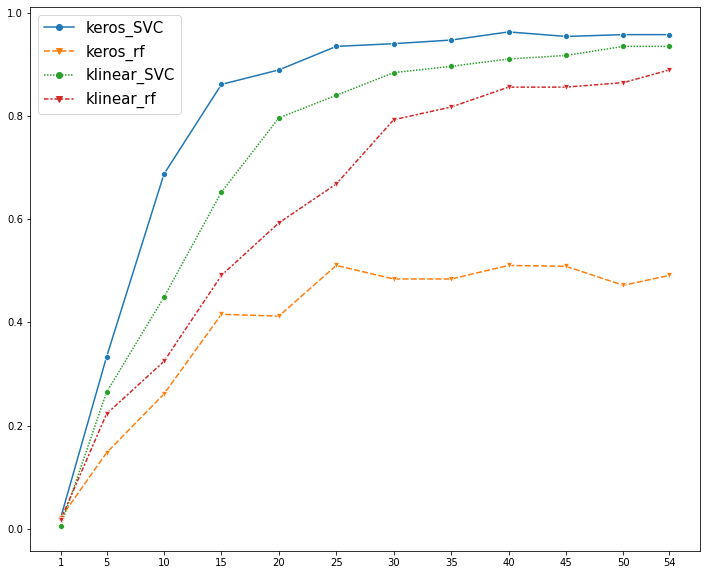

In [5]:
markers = ['o','v','o','v',]
sizes = [20,20,20,20]
plt.figure(figsize=(12,10))
sns.lineplot(data=df, markers=markers, sizes=sizes)
plt.xticks(n_pcs)
plt.legend(fontsize=15)

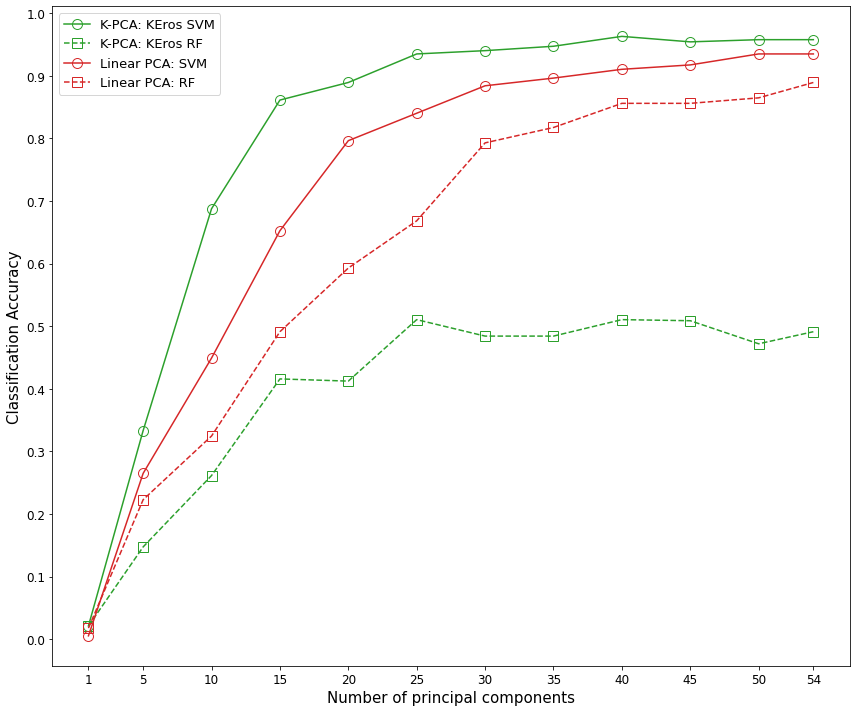

In [8]:
plt.figure(figsize=(12,10))
plt.plot(n_pcs, keros_SVC,      marker='o', label='K-PCA: KEros SVM',      color='tab:green', linestyle='-',   markersize=10, fillstyle='none', mew=1, linewidth=1.5   )
plt.plot(n_pcs, keros_rf,       marker='s', label='K-PCA: KEros RF',       color='tab:green', linestyle='--',   markersize=10, fillstyle='none', mew=1, linewidth=1.5   )
plt.plot(n_pcs, klinear_SVC,    marker='o', label='Linear PCA: SVM',    color='tab:red',   linestyle='-',   markersize=10, fillstyle='none',   mew=1, linewidth=1.5   )
plt.plot(n_pcs, klinear_rf,     marker='s', label='Linear PCA: RF',     color='tab:red',   linestyle='--',   markersize=10, fillstyle='none',   mew=1, linewidth=1.5   )
plt.xticks(n_pcs, fontsize=12)
plt.yticks(np.linspace(0,1, endpoint=True, num=11), fontsize=12)
plt.xlabel('Number of principal components', fontsize=15)
plt.ylabel('Classification Accuracy', fontsize=15)
plt.legend(fontsize=13)
plt.tight_layout()
plt.savefig('../images/pca_comparison.png', format='png', dpi=300)

# toy test KNN

In [161]:
from sklearn.datasets import make_classification

data, labels = make_classification(n_samples=100, n_classes=3, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)

In [162]:
labels

array([0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 0, 0,
       2, 2, 0, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 2, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0,
       0, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 0])

In [163]:
df = pd.DataFrame(data)
df['label'] = labels
lab = 0
mask_lab = df.label == lab
class_A_data = df[mask_lab][[0,1]]
lab = 1
mask_lab = df.label == lab
class_B_data = df[mask_lab][[0,1]]
lab = 2
mask_lab = df.label == lab
class_C_data = df[mask_lab][[0,1]]

In [164]:
class_C_data

,0,1
3,0.101606,-1.467776
6,1.402339,-2.199852
8,0.310080,-1.516439
10,-0.154691,-1.688979
13,0.917005,-1.883127
17,1.092350,-0.847566
22,-0.970890,0.536004
23,1.282812,0.467026
25,1.463611,-1.109301
27,0.329861,-1.929615


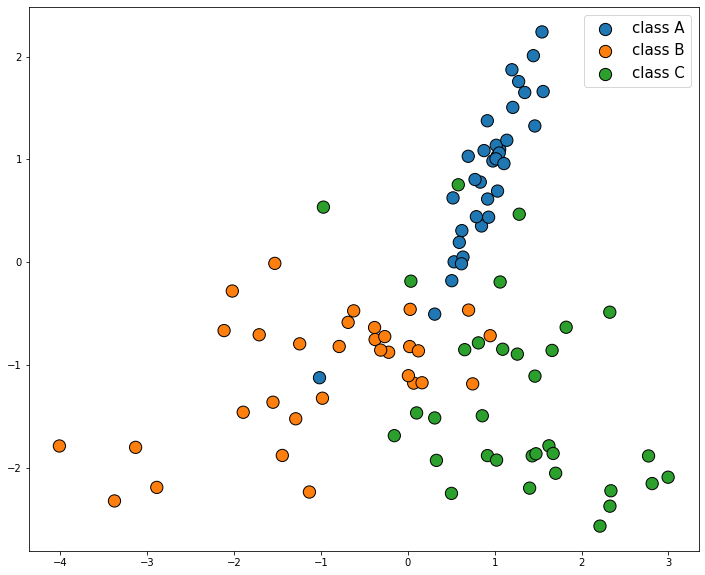

In [165]:
plt.figure(figsize=(12,10))
plt.scatter(class_A_data.iloc[:,0], class_A_data.iloc[:,1], marker="o", s=25, edgecolor="k", sizes=len(class_A_data)*[150], label='class A')
plt.scatter(class_B_data.iloc[:,0], class_B_data.iloc[:,1], marker="o", s=25, edgecolor="k", sizes=len(class_B_data)*[150], label='class B')
plt.scatter(class_C_data.iloc[:,0], class_C_data.iloc[:,1], marker="o", s=25, edgecolor="k", sizes=len(class_C_data)*[150], label='class C')
#plt.scatter(data[:,0], y=data[:,1], marker="o", c=labels, s=25, edgecolor="k", sizes=labels.size*[150])
plt.legend(fontsize=15)

In [179]:
class_labels = ['class A', 'class B', 'class C']
d = {k:v for k,v in zip([0,1,2],class_labels)}
new_labels = [d[l] for l in labels]

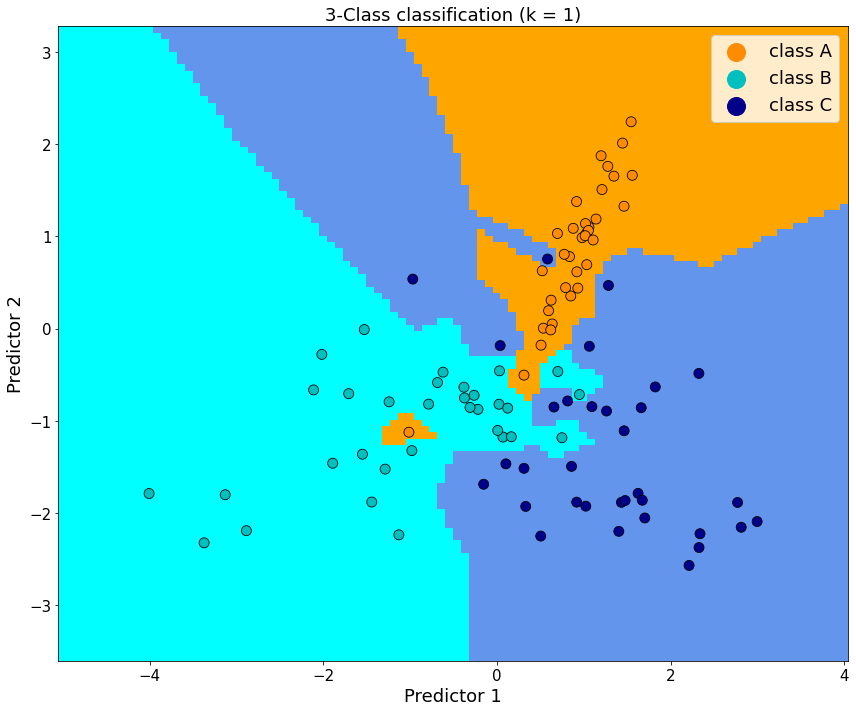

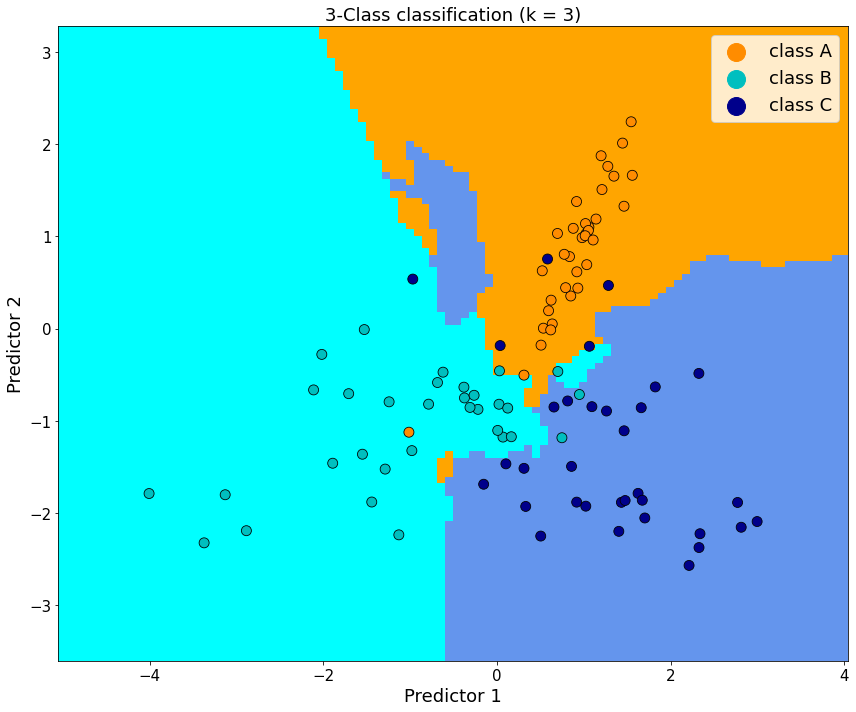

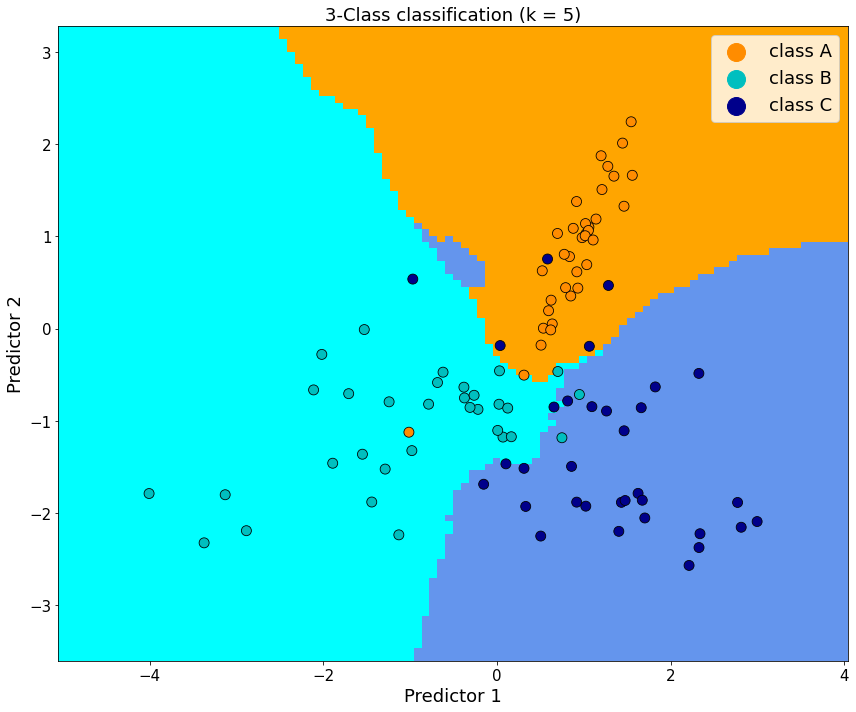

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = [1,3,5]


# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = data
y = labels

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for n_neigh in n_neighbors:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neigh, weights='uniform')
    clf.fit(X, y)

    _, ax = plt.subplots(figsize=(12,10))
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel='p1',
        ylabel='p2',
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=new_labels,
        s=100,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    #ax.legend(['class A', 'class B', 'class C'], fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.legend(fontsize=18, markerscale=3)
    plt.title(
        "3-Class classification (k = %i)" % (n_neigh), fontsize=18
    )
    #ax.set_xticks(ax.get_xticklabels(), fontsize=15)
    #ax.set_yticks(ax.get_yticklabels(), fontsize=15)
    ax.set_xlabel('Predictor 1', fontsize=18)
    ax.set_ylabel('Predictor 2', fontsize=18)
    plt.tight_layout()
    plt.savefig(f'../images/knn_{n_neigh}.png', format='png', dpi=300)
plt.show()

# plot results

In [5]:
from numpy import column_stack


#keros_svm =     0.96315789      # 40 pcs
keros_svm =     0.95789474      # 54 pcs
#keros_rf =      0.51052632      # 25 pcs
keros_rf =      0.49122807      # 54 pcs
#klinear_svm =   0.93508772      # 50 pcs
klinear_svm =   0.93508772      # 54 pcs
klinear_rf =    0.88947368      # 54 pcs
ts_forests =    0.93157895
knn_dtw =       0.78070175
svm_gak =       0.84912281

indices = ['K-PCA: KEros SVM', 'K-PCA: KEros RF', 'Linear PCA: SVM', 'Linear PCA: RF', 'Time Series Forest', 'K-NN w/ DTW', 'K-SVM w/ GAK']
colors = ['tab:green', 'tab:green', 'tab:red', 'tab:red', 'tab:blue', 'tab:orange', 'tab:purple']
accuracy_values = [keros_svm, keros_rf , klinear_svm, klinear_rf, ts_forests, knn_dtw  , svm_gak]

acc_df = pd.DataFrame(accuracy_values, index=indices, columns=['Accuracy'])

In [6]:
acc_df['colors'] = colors

In [7]:
acc_df.sort_values('Accuracy', ascending=True, inplace=True)

In [8]:
for i, v in enumerate(zip(acc_df['Accuracy'], acc_df.index)):
    print(i,v)

0 (0.49122807, 'K-PCA: KEros RF')
1 (0.78070175, 'K-NN w/ DTW')
2 (0.84912281, 'K-SVM w/ GAK')
3 (0.88947368, 'Linear PCA: RF')
4 (0.93157895, 'Time Series Forest')
5 (0.93508772, 'Linear PCA: SVM')
6 (0.95789474, 'K-PCA: KEros SVM')


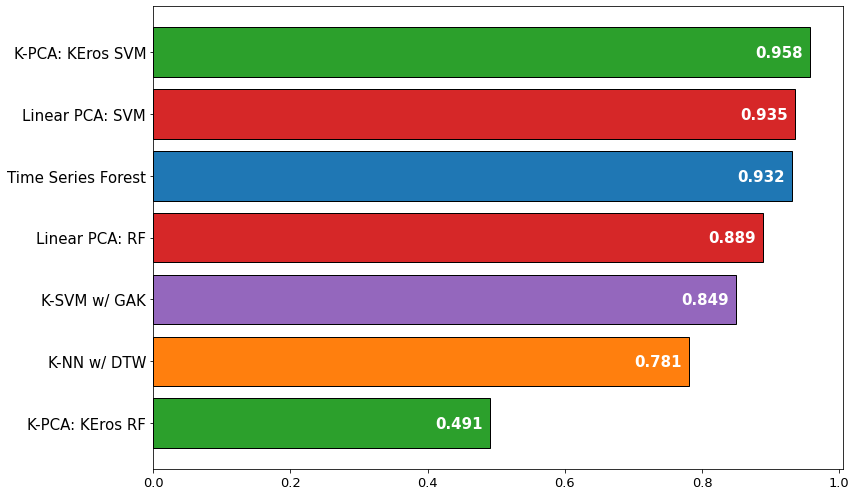

In [9]:
plt.figure(figsize=(12,7))
plt.barh(y=acc_df.index, width=acc_df['Accuracy'], color=acc_df['colors'], edgecolor = 6*['k'])

for i, v in enumerate(acc_df['Accuracy']):
    if i == len(acc_df['Accuracy'])-1:
        plt.text(v - .08, i -0.08, str(np.round(v, decimals=3)), color='white', fontweight='bold', fontsize=15)
    else:
        plt.text(v - .08, i -0.08, str(np.round(v, decimals=3)), color='white', fontweight='bold', fontsize=15)



# # 40 pcs KEros SVM
# plt.text(.01, 6 -0.08, '40 PC_s', color='w', fontweight='bold', fontsize=15)
# # 25 pcs KEros RF
# plt.text(.01, 0 -0.08, '25 PC_s', color='w', fontweight='bold', fontsize=15)
# # 50 pcs KLinear SVM
# plt.text(.01, 5 -0.08, '50 PC_s', color='w', fontweight='bold', fontsize=15)
# # 54 pcs KLinear RF
# plt.text(.01, 3 -0.08, '54 PC_s', color='w', fontweight='bold', fontsize=15)




plt.yticks(fontsize=15)
plt.xticks(fontsize=13)

plt.tight_layout()
plt.savefig('../images/accuracy_comparison.png', format='png', dpi=300)